# One-vs-all Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import scipy.stats
import scipy.optimize
%matplotlib inline

In [2]:
def load_data(filename):
    data = scipy.io.loadmat(filename)
    y = data['y'].flatten()
    y[y == 10] = 0
    return data['X'], y

X, y = load_data('data/ex3data1.mat')
print(X.shape)
print(y.shape)

(5000, 400)
(5000,)


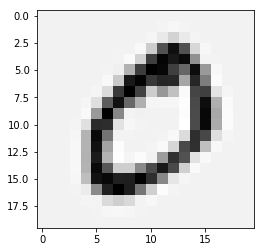

In [3]:
def plot_number(img):
    plt.imshow(img.reshape(20, 20).T, cmap='gray_r')

plot_number(X[0])

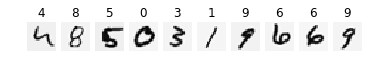

In [4]:
def plot_random(X, y, rows, cols):
    size = rows * cols
    idxs = np.random.choice(X.shape[0], size=size, replace=False)
    for i in range(0, rows):
        for j in range(0, cols):
            idx = i * cols + j
            plt.subplot(rows, cols, idx + 1)
            plot_number(X[idxs[idx]])
            plt.axis('off')
            plt.title(y[idxs[idx]])

plot_random(X, y, 1, 10)
plt.show()

In [5]:
def add_bias(X):
    m = X.shape[0]
    return np.concatenate((np.ones((m, 1)), X), axis=1)

test_X = add_bias(np.arange(1, 16).reshape(3, 5).T / 10)
test_X

array([[ 1. ,  0.1,  0.6,  1.1],
       [ 1. ,  0.2,  0.7,  1.2],
       [ 1. ,  0.3,  0.8,  1.3],
       [ 1. ,  0.4,  0.9,  1.4],
       [ 1. ,  0.5,  1. ,  1.5]])

In [6]:
def cost_function(theta, X, y, lam):
    # eplison so log will not fail on zeros
    EPS = np.finfo(np.float64).eps
    m = y.shape[0]
    h_theta = scipy.stats.logistic.cdf(X.dot(theta))
    m_inv = 1 / m
    J = m_inv * (-y.dot(np.log(h_theta + EPS)) - (1 - y).dot(np.log(1 - h_theta + EPS)))
    J += (lam / (2 * m)) * np.sum(theta[1:] ** 2)
    gradient = m_inv * (h_theta - y).dot(X)
    gradient[1:] += (lam / m) * theta[1:]
    return J, gradient

cost_function(
    theta=np.array([-2, -1, 1, 2]),
    X=test_X,
    y=np.array([1, 0, 1, 0, 1]),
    lam=3,
)

(2.5348193961097434,
 array([ 0.14656137, -0.54855841,  0.72472227,  1.39800296]))

In [7]:
def one_vs_all(X, y, num_labels, lam):
    n = X.shape[1]
    theta = np.zeros((num_labels, n))
    for c in range(num_labels):
        fun = lambda t: cost_function(t, X, y == c, lam)
        theta[c, :]= scipy.optimize.minimize(
            fun=fun,
            x0=np.zeros(n),
            jac=True,
            options={'maxiter': 500, 'disp': True},
            method='CG'
        ).x
    return theta

theta = one_vs_all(add_bias(X), y, num_labels=10, lam=3)

Optimization terminated successfully.
         Current function value: 0.029002
         Iterations: 73
         Function evaluations: 288
         Gradient evaluations: 288
Optimization terminated successfully.
         Current function value: 0.035495
         Iterations: 83
         Function evaluations: 339
         Gradient evaluations: 339
Optimization terminated successfully.
         Current function value: 0.079974
         Iterations: 68
         Function evaluations: 212
         Gradient evaluations: 212
Optimization terminated successfully.
         Current function value: 0.081402
         Iterations: 78
         Function evaluations: 267
         Gradient evaluations: 267
Optimization terminated successfully.
         Current function value: 0.064211
         Iterations: 64
         Function evaluations: 195
         Gradient evaluations: 195
Optimization terminated successfully.
         Current function value: 0.092909
         Iterations: 77
         Function evaluati

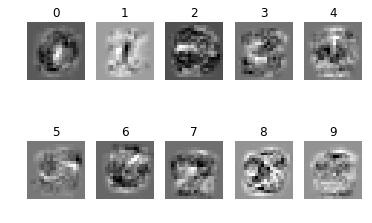

In [8]:
def plot_theta(theta, num_labels):
    for c in range(num_labels):
        plt.subplot(2, num_labels / 2, c + 1)
        plt.axis('off')
        plt.title(c)
        plot_number(theta[c, 1:])

plot_theta(theta, 10)

In [9]:
def predict(X, theta):
    return np.argmax(X.dot(theta.T), axis=1)

In [10]:
predicted = predict(add_bias(X), theta)
print('training set accuracy: {}%'.format(
    np.mean(predicted == y) * 100
))

training set accuracy: 93.30000000000001%


## Display Misslabled

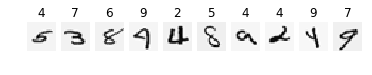

In [11]:
miss_idx = predicted != y
plot_random(X[miss_idx], predicted[miss_idx], 1, 10)

0: 5.5%
1: 0.0%
2: 0.1%
3: 0.0%
4: 0.4%
5: 0.0%
6: 0.1%
7: 31.2%
8: 0.7%
9: 9.8%


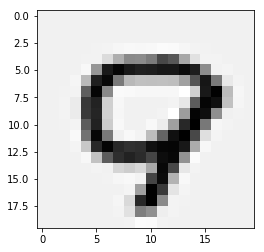

In [12]:
def print_probabilities(x, theta):
    z = add_bias(np.array([x])).dot(theta.T)
    a = scipy.stats.logistic.cdf(z[0])
    for i, p in enumerate(a * 100):
        print('{}: {:.1f}%'.format(i, p))

def show_misslabeled(X, theta, idx):
    a = X[idx]
    print_probabilities(a, theta)
    plot_number(a)

show_misslabeled(X[miss_idx], theta, -1)